# InSitu Merge of data using Pandas

Super fast mechanism for merging data (faster than you can write).  Sometimes merging data from disparate sensors or data feeds can be problematic.  Using Pandas merging solutions it becomes much like a join in SQL.

**Reference:**

+ https://pandas.pydata.org/docs/user_guide/merging.html

+ https://geoviews.org/user_guide/Projections.html

+ https://projectpythia.org/web-map-feature-services-cookbook/notebooks/web_map_services.html


## Project Setup

In [ ]:
# Let's define some variables (information holders) for our project overall
# If using GCP or a similar Cloud Service Provider (CSP), you might be required
# to provide project details.

global PROJECT_ID, BUCKET_NAME, LOCATION
BUCKET_NAME =""
PROJECT_ID  =""
LOCATION    =""

BOLD_START="\033[1m"
BOLD_END="\033[0m"

## Import Base Libraries

In [ ]:
# Import key libraries necessary to support dynamic installation of additional libraries
# Use subprocess to support running operating system commands from the program, using the "bang" (!)
# symbology is supported, however that does not translate to an actual python script, this is a more
# agnostic approach.
###########################################
#- Minimal imports to start
###########################################
try:
    import sys
    import subprocess
    import importlib.util
    import atexit
    import os
except ImportError as e:
    print("There was a problem importing the most basic libraries necessary for this code.")
    print(repr(e))
    raise SystemExit("Stop right there!")

###########################################
#- Final Exit Routine
###########################################
@atexit.register
def goodbye():
    print("GOODBYE")

## Download External Library

In [ ]:
target_folder="/content/folderOnColab"
target_repo="https://raw.githubusercontent.com//christophergarthwood/jbooks/main"
target_files=["debug.py"]
print(f"Creating a folder ({target_folder}) to store project data.")
subprocess.run(["mkdir", "-p" , target_folder])
if os.path.isdir(target_folder):
  print("Performing wget on:")
  for idx, filename in enumerate(target_files):
    print(f"...{filename} to target folder: {target_folder}")
    try:
      subprocess.run(["/usr/bin/wget", f"--directory-prefix={target_folder}", f"{target_repo}/{filename}"], check=True)
    except Exception as e:
      print("")
      print(f"ERROR: There was a problem performing wget on the target file ({filename}), see Exception: {str(e)}")
      print("...talk to the instructor.")
    if os.path.isfile(target_folder+os.sep+filename):
      print("...verified copy.")
    else:
      print(f"...copy NOT verified, check the {target_folder} for the existence of {filename}")
else:
    print("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
    print(f"...target folder: {target_folder}")
    print("...if you can't find the problem contact the instructor.")

Creating a folder (/content/folderOnColab) to store project data.
Performing wget on:
...debug.py to target folder: /content/folderOnColab
...verified copy.


In [ ]:
###########################################
#- Import External Libraries
###########################################
from pathlib import Path
debug_lib_location = Path(target_folder)
sys.path.append(str(debug_lib_location))

try:
  import debug
  debug.msg_debug("...debug library loaded.")
except ImportError as e:
  rprint("There was a problem importing the debug library.")
  rprint(repr(e))
  raise SystemExit("Without the debug library this code will not run.")

[2025-02-05 17:22:45 UTC]   DEBUG: ...debug library loaded. 


DEBUG:msg_logs:...debug library loaded.


## Load minimally required libraries

In [ ]:
libraries=["numpy", "pandas", "scipy", "sklearn", "matplotlib", "seaborn",
           "rich", "rich[jupyter]", "unidecode", "icecream",
           "polars[all]", "dask[complete]", "xarray",
           "tqdm", "watermark",
           "Pillow",]

import importlib.util

for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"])
    else:
      print("Library " + library + " already installed.")

Library numpy already installed.
Library pandas already installed.
Library scipy already installed.
Library sklearn already installed.
Library matplotlib already installed.
Library seaborn already installed.
Library rich already installed.
Installing library rich[jupyter]
Library unidecode already installed.
Library icecream already installed.
Installing library polars[all]
Installing library dask[complete]
Library xarray already installed.
Library tqdm already installed.
Library watermark already installed.
Library Pillow already installed.


## Environment check

In [ ]:
#- Environment Check
import datetime
import platform

RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())
current_time   = datetime.datetime.now()
operating_system=platform.system()

if RunningInCOLAB:
    python_environment=" Google Colab "
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"
else:
    python_environment=" Python command-line "

print(f"You are running this notebook in {python_environment} at {BOLD_START}{current_time}{BOLD_END} on {BOLD_START}{operating_system}{BOLD_END} in the {BOLD_START}{PROJECT_ID}{BOLD_END} lab.")

You are running this notebook in  Google Colab  at 2025-02-05 17:23:05.661681 on Linux in the  lab.


## Includes and Libraries

In [ ]:
############################################
#INCLUDES
############################################
import csv
from datetime import datetime, timedelta
import fnmatch
import statistics
import pickle

#Generally useful / common libraries
import os
import subprocess
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings
from pathlib import Path

#Data Science
import numpy as np
import pandas as pd
import polars as pl
import dask as da
import xarray as xr

#Pretty Print
from rich import print as rprint
from icecream import ic
from tqdm.notebook import trange, tqdm
from watermark import watermark as the_watermark

#libraries specific to this example
import scipy as sp
from sklearn.linear_model import LinearRegression

#- Graphics
import matplotlib.pyplot as plt
import matplotlib as matplt
import matplotlib
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)
from matplotlib.pyplot import imshow
from matplotlib.patches import Circle
from PIL import Image as PIL_Image
import PIL.ImageOps
import seaborn as sns

#- Image meta-data for Section 508 compliance
import piexif
from piexif.helper import UserComment

#- Additional libraries for this work
import math
from base64 import b64decode
#from IPython.display import Image, Markdown
from IPython.display import Image, Markdown
import pandas, IPython.display as display, io, jinja2, base64
import requests
import unidecode

## Functions

In [ ]:
# Functions are like legos that do one thing, this function outputs library version history of effort.
def lib_diagnostics() -> None:

    import pkg_resources

    package_name_length=20
    package_version_length=10

    data_version_release="-".join([str(VERSION_NAME),str(VERSION_MAJOR), str(VERSION_MINOR), str(VERSION_RELEASE)])
    rprint(f"Software Version Information: {data_version_release}")
    rprint("\n")
    # Show notebook details
    #%watermark?
    #%watermark --github_username christophergwood --email christopher.g.wood@gmail.com --date --time --iso8601 --updated --python --conda --hostname --machine --githash --gitrepo --gitbranch --iversions --gpu
    # Watermark
    rprint(the_watermark(author=f"{AUTHOR_NAME}", github_username=f"GITHUB_USERNAME", email=f"{AUTHOR_EMAIL}",iso8601=True, datename=True, current_time=True, python=True, updated=True, hostname=True, machine=True, gitrepo=True, gitbranch=True, githash=True))


    print(f"{BOLD_START}Packages:{BOLD_END}")
    print("")
    # Get installed packages
    the_packages=["nltk", "numpy", "os", "pandas", "seaborn"]
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    for package_idx, package_name in enumerate(installed):
         if package_name in the_packages:
             installed_version = installed[package_name]
             rprint(f"{package_name:<40}#: {str(pkg_resources.parse_version(installed_version)):<20}")

    try:
        rprint(f"{'TensorFlow version':<40}#: {str(tf.__version__):<20}")
        rprint(f"{'     gpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('GPU')))}")
        rprint(f"{'     cpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('CPU')))}")
    except Exception as e:
        pass

    try:
        rprint(f"{'Torch version':<40}#: {str(torch.__version__):<20}")
        rprint(f"{'     GPUs available?':<40}#: {torch.cuda.is_available()}")
        rprint(f"{'     count':<40}#: {torch.cuda.device_count()}")
        rprint(f"{'     current':<40}#: {torch.cuda.current_device()}")
    except Exception as e:
        pass


    try:
      print(f"{'OpenAI Azure Version':<40}#: {str(the_openai_version):<20}")
    except Exception as e:
      pass

    return

In [ ]:
# Routines designed to support adding ALT text to an image generated through Matplotlib.

def capture(figure):
   buffer = io.BytesIO()
   figure.savefig(buffer)
   #return F"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"
   return F"data:image/jpg;base64,{base64.b64encode(buffer.getvalue()).decode()}"

def make_accessible(figure, template, **kwargs):
   return display.Markdown(F"""![]({capture(figure)} "{template.render(**globals(), **kwargs)}")""")


# requires JPG's or TIFFs
def add_alt_text(image_path, alt_text):
    try:
        if os.path.isfile(image_path):
          img = PIL_Image.open(image_path)
          if "exif" in img.info:
              exif_dict = piexif.load(img.info["exif"])
          else:
              exif_dict={}

          w, h = img.size
          if "0th" not in exif_dict:
            exif_dict["0th"]={}
          exif_dict["0th"][piexif.ImageIFD.XResolution] = (w, 1)
          exif_dict["0th"][piexif.ImageIFD.YResolution] = (h, 1)

          software_version=" ".join(["STEM-001 with Python v", str(sys.version).split(" ")[0]])
          exif_dict["0th"][piexif.ImageIFD.Software]=software_version.encode("utf-8")

          if "Exif" not in exif_dict:
            exif_dict["Exif"]={}
          exif_dict["Exif"][piexif.ExifIFD.UserComment] = UserComment.dump(alt_text, encoding="unicode")

          exif_bytes = piexif.dump(exif_dict)
          img.save(image_path, "jpeg", exif=exif_bytes)
        else:
          rprint(f"Cound not fine {image_path} for ALT text modification, please check your paths.")

    except (FileExistsError, FileNotFoundError, Exception) as e:
        process_exception(e)

# Appears to solve a problem associated with GPU use on Colab, see: https://github.com/explosion/spaCy/issues/11909
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"


In [ ]:
# this function displays the stack trace on errors from a central location making adjustments to the display on an error easier to manage
# functions perform useful solutions for highly repetitive code
def process_exception(inc_exception: Exception) -> None:
  try:
    if DEBUG_STACKTRACE==1:
      traceback.print_exc()
      console.print_exception(show_locals=True)
    else:
      rprint(repr(inc_exception))
  except Exception as e:
    rprint(repr(inc_exception))

In [ ]:
#library configurations examples using Pandas
def setup_libary_configuration() -> None:
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

    #nump equivalent
    np.set_printoptions(precision=4)

## Variable declaration

In [ ]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1
DEBUG_DATA = 0
# used to fully display the error stack, set to 1 if you want to see a ridiculous amount of debugging information
DEBUG_STACKTRACE=0

VERSION_NAME    = "InSitu-Flow-Thru"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1

# API Parameters for things like WordCloud, variables help hold information for later use
# The "constants" represent variables that we don't anticipate changing over the course of the program.
IMG_BACKGROUND="black"     #options are black, white, another color or None
IMG_FONT_SIZE_MIN=10
IMG_WIDTH=1024
IMG_HEIGHT=768
IMG_INTERP="bilinear"
IMG_ALPHA=0.8
IMG_ASPECT="equal"
FIGURE_WIDTH=11
FIGURE_HEIGHT=8.5
WORD_FREQ=10

# specify how image formats will be saved
IMG_EXT=".jpg"

# location of our working files
WORKING_FOLDER="/content/folderOnColab"
SRC_DIR=WORKING_FOLDER

# Notebook Author details
AUTHOR_NAME="Christopher G Wood"
GITHUB_USERNAME="christophergarthwood"
AUTHOR_EMAIL="christopher.g.wood@gmail.com"

# Encoding
ENCODING  ="utf-8"
os.environ['PYTHONIOENCODING']=ENCODING

############################################
#APPLICATION VARIABLES
############################################
#define ACS data setup
ACS_FILE="ACS.txt"
ACS_ID="12L8VRY6J1Sj-B1vIf-ODh4kjHWHqIzm8"
ACS_HEADER=["%Year","Month","Day","Hour","Minute","Second(UTC)","Longitude(deg)","Latitude(deg)","Pressure(dbar)","C400","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7"]
ACS_HEADER_COUNT=len(ACS_HEADER)
ACS_DOMAIN=ACS_HEADER[9:]

#define seabird data setup
SEB_FILE="SBE49_PTCS.txt"
SEB_ID="166jSzUqYS54zmN0rmUY9zJFMzV4Wg3-9"
SEB_HEADER=["Year","Month","Day","Hour","Minute","Second","Longitude","Latitude","Pressure(dbar)","Temperature(C)","Conductivity(S/m)","Salinity"]
SEB_HEADER_COUNT=len(SEB_HEADER)
SEB_DOMAIN=SEB_HEADER[8:]

SRC_DATETIME_FORMAT="%m/%d/%Y %H:%M:%S"
OPT_DT_FMT="%Y%m%d:%H%M%S"

#Output header
OTO_HEADER="%Year,Month,Day,Hour,Minute,Second,Longitude,Latitude,Pressure(dbar),Temperature(C),Conductivity(S/m),Salinity,ACS_Pressure,C400,C404.1,C407.1,C410.5,C413.9,C417.4,C421.5,C426,C430.1,C433.8,C437.9,C442.1,C446.3,C451.1,C455.7,C459.9,C464.1,C468.5,C473.3,C478,C483.1,C487.6,C491.8,C496,C500.1,C504.8,C509.5,C514.4,C519.2,C523.9,C528.2,C532.3,C536.6,C540.9,C545.4,C549.9,C554.3,C558.7,C563.2,C567.6,C571.5,C575.4,C579.3,C582.9,C587.6,C591.7,C596,C600.6,C605,C609.3,C613.9,C618.4,C622.5,C626.5,C630.9,C635,C639.3,C643.6,C647.9,C652.7,C657,C661.4,C665.9,C670.3,C674.7,C678.8,C683.2,C687.1,C690.8,C694.7,C698.9,C702.3,C706.3,C710,C714.2,C717.6,C721.4,C725.6,C729.2,C732.7,C735.9,C739.4,C743.7,A398.4,A402.1,A405.7,A408.9,A412.3,A415.8,A419.8,A424,A428.3,A432.2,A436.1,A440.3,A444.8,A4,49.5,A454.1,A458.3,A462.4,A466.8,A471.5,A476.4,A481.3,A486,A490.2,A494.4,A498.8,A503.1,A507.8,A512.6,A517.7,A522.5,A526.8,A531.1,A535.3,A539.7,A544.2,A548.7,A553.1,A557.5,A562.2,A566.6,A570.8,A574.6,A578.6,A582,A585.8,A589.6,A594,A598.7,A602.9,A607.6,A611.8,A616.5,A620.9,A625.2,A629.4,A633.7,A637.7,A642.1,A646.4,A650.9,A655.4,A660,A664.7,A669,A673.6,A677.8,A682,A685.9,A690,A693.7,A697.9,A701.7,A705.4,A709.2,A713.4,A717.1,A720.8,A724.6,A728.6,A732.1,A735.6,A738.9,A742.7"

SRC_FILE_COARSE_RES=ACS_FILE
COARSE_HEADER=ACS_HEADER
COARSE_DOMAIN=ACS_DOMAIN

SRC_FILE_FINE_RES=SEB_FILE
FINE_HEADER=SEB_HEADER
FINE_DOMAIN=SEB_DOMAIN

TIME_DELTA=1
TARGET_FILE_1TM="one_to_many.csv"
TARGET_FILE_1T1="one_to_one.csv"

SRC_FILE_COARSE_RES=SRC_DIR + os.sep + ACS_FILE
SRC_FILE_FINE_RES=SRC_DIR + os.sep +  SEB_FILE


## Library Invocation

Note that it's also useful to use this code so that you carry around a list of version dependencies and know how you did something (version)

In [ ]:
rprint("Library Diagnostics")
setup_libary_configuration()
lib_diagnostics()

Library Diagnostics

<ipython-input-8-7a98eaf52e4d>:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Software Version Information: InSitu-Flow-Thru-0-0-1

Author: Christopher G Wood

Github username: GITHUB_USERNAME

Email: christopher.g.wood@gmail.com

Last updated: 2025-02-05T17:23:08.980353+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.167+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: 757a20244e36

Git hash: 

Git repo: 

Git branch:

Packages:



nltk                                    #: 3.9.1

numpy                                   #: 1.26.4

pandas                                  #: 2.2.2

seaborn                                 #: 0.13.2

## Data Read

Your you own method to pull in the data or default to the Google Storage method where we copy the files to a local location.

In [ ]:
target_folder=WORKING_FOLDER

target_files=[ACS_ID, SEB_ID]
target_filenames=[ACS_FILE, SEB_FILE]

debug.msg_info(f"Creating a folder ({target_folder}) to store project data.")

try:
  if os.path.isfile(target_folder):
    raise OSError("Cannot create your folder a file of the same name already exists there, work with your instructor or remove it yourself.")
  elif os.path.isdir(target_folder):
    debug.msg_debug(f"The folder named ({target_folder}) {BOLD_START}already exists{BOLD_END}, we won't try to create a new folder.")
  else:
    subprocess.run(["mkdir", "-p" , target_folder], check=True)
except (subprocess.CalledProcessError, Exception) as e:
  process_exception(e)

for idx, the_name in enumerate(target_files):
  try:
    debug.msg_debug(f"...downloading {target_filenames[idx]}.")
    subprocess.run(["gdown", f"{the_name}", "--no-check-certificate",  "--continue", "-O", f"{target_folder}{os.sep}{target_filenames[idx]}"], check=True)
  except (subprocess.CalledProcessError, Exception) as e:
    process_exception(e)
    raise SystemError

debug.msg_info("Files downloaded:")
cmd=["ls ", "-alR", f"{target_folder}{os.sep}*",]
completed_process=subprocess.run(cmd, check=True, shell=True, capture_output=True, text=True)
if (completed_process.returncode==0):
  debug.msg_debug(completed_process.stdout)
else:
  debug.msg_warning(f"Command failed with error code of: {completed_process.returncode}")

[2025-02-05 17:23:09 UTC]    INFO: Creating a folder (/content/folderOnColab) to store project data. 


INFO:msg_logs:Creating a folder (/content/folderOnColab) to store project data.


[2025-02-05 17:23:09 UTC]   DEBUG: The folder named (/content/folderOnColab) already exists, we won't try to create a new folder. 


DEBUG:msg_logs:The folder named (/content/folderOnColab) already exists, we won't try to create a new folder.


[2025-02-05 17:23:09 UTC]   DEBUG: ...downloading ACS.txt. 


DEBUG:msg_logs:...downloading ACS.txt.


CompletedProcess(args=['gdown', '12L8VRY6J1Sj-B1vIf-ODh4kjHWHqIzm8', '--no-check-certificate', '--continue', '-O', '/content/folderOnColab/ACS.txt'], returncode=0)

[2025-02-05 17:23:13 UTC]   DEBUG: ...downloading SBE49_PTCS.txt. 


DEBUG:msg_logs:...downloading SBE49_PTCS.txt.


CompletedProcess(args=['gdown', '166jSzUqYS54zmN0rmUY9zJFMzV4Wg3-9', '--no-check-certificate', '--continue', '-O', '/content/folderOnColab/SBE49_PTCS.txt'], returncode=0)

[2025-02-05 17:23:18 UTC]    INFO: Files downloaded: 


INFO:msg_logs:Files downloaded:


[2025-02-05 17:23:18 UTC]   DEBUG: All_flo-thru.dat
folderOnColab
 


DEBUG:msg_logs:All_flo-thru.dat
folderOnColab



## Application Specific Function Definitions

In [ ]:
def quick_df_stats(inc_df:pd.DataFrame,
                   inc_header_count: int,
                   ) -> None:
    '''
    Load the coarse data (ACS) and return as a pd.DataFrame.

            Parameters:
                   inc_df (pd.DataFrame): Dataframe to be inspected, displayed
                   inc_header_count (int): Anticipated number of columns to read in (validation check)

            Returns:
                    Printed output
    '''
    if DEBUG:
      rprint("Coarse Resolution data has: " + str(inc_df.columns))
      rprint("\n")
      rprint(f"""{"size":20} : {inc_df.size:15,} """)
      rprint(f"""{"shape":20} : {str(inc_df.shape):15} """)
      rprint(f"""{"ndim":20} : {inc_df.ndim:15,} """)
      rprint(f"""{"column size":20} : {inc_df.columns.size:15,} """)

      #index added so you get an extra column
      rprint(f"""{"Read":20} : {inc_df.columns.size-1:15,} """)
      rprint(f"""{"Expected":20} : {inc_header_count:10,} """)
      if ( (inc_df.columns.size-1) == inc_header_count):
          print(f"{BOLD_START}Expectations met{BOLD_END}.")
      else:
          print(f"Expectations {BOLD_START}not met{BOLD_END}, check your datafile, columns don't match.")
      rprint("\n")
      #rprint(str(inc_df.describe()))



In [ ]:
def load_coarse_data() -> pd.DataFrame:
    '''
    Load the coarse data (ACS) and return as a pd.DataFrame.

            Parameters:
                    None

            Returns:
                    df_coarse (pd.DataFrame): Pandas dataframe of coarse data
    '''

    df = pd.read_csv(SRC_FILE_COARSE_RES, sep="\t", index_col=False)
    df.reset_index(inplace=True)

    quick_df_stats(df,ACS_HEADER_COUNT)

    return df

In [ ]:
def load_fine_data() -> pd.DataFrame:
    '''
    Load the finer (SBE) data and return as a pd.DataFrame.

            Parameters:
                    None

            Returns:
                    df_coarse (pd.DataFrame): Pandas dataframe of coarse data
    '''
    df = pd.read_csv(SRC_FILE_FINE_RES, sep="\s+")
    df.reset_index(inplace=True)

    quick_df_stats(df,SEB_HEADER_COUNT)

    return df

In [ ]:
#load the data file and then display some results

df_coarse=load_coarse_data()

Coarse Resolution data has: Index(['index', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second(UTC)',
       'Longitude(deg)', 'Latitude(deg)', 'Pressure(dbar)',
       ...
       'A709.2', 'A713.4', 'A717.1', 'A720.8', 'A724.6', 'A728.6', 'A732.1',
       'A735.6', 'A738.9', 'A742.7'],
      dtype='object', length=176)

size                 :       9,476,192

shape                : (53842, 176)

ndim                 :               2

column size          :             176

Read                 :             175

Expected             :        175

Expectations met.


In [ ]:
#load the data file and then display some results
df_fine=load_fine_data()

Coarse Resolution data has: Index(['index', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Longitude', 'Latitude', 'Pressure(dbar)', 'Temperature(C)',
       'Conductivity(S/m)', 'Salinity'],
      dtype='object')

size                 :       1,259,739

shape                : (96903, 13)

ndim                 :               2

column size          :              13

Read                 :              12

Expected             :         12

Expectations met.


## Data Preparation Example

This is a way to ensure you get the data in the specific format you want.

Notice the lambda expressions, used to execute a for loop in a single line and optimized for Pandas for fastest execution.

Lambda expressions below are used to create a "time" field since the coarse data (Sea Bird) had fields discretely split out

In [ ]:
############################################
#COARSE DATA TIME/DATE Preparation
############################################

df_coarse['Month']    = df_coarse['Month'].astype(int).astype(str)
df_coarse['Day']      = df_coarse['Day'].astype(int).astype(str)
df_coarse['Year']     = df_coarse['Year'].astype(int).astype(str)
df_coarse['Hour']     = df_coarse['Hour'].astype(int).astype(str)
df_coarse['Minute']   = df_coarse['Minute'].astype(int).astype(str)
df_coarse['Seconds']   = df_coarse['Second(UTC)'].astype(int).astype(str)
df_coarse['Second']   = df_coarse['Second(UTC)'].astype(int).astype(str)
df_coarse['Date_Cal'] = df_coarse[['Year','Month','Day']].apply(lambda x: '/'.join(x), axis=1)
df_coarse['Date_Time']= df_coarse[['Hour','Minute','Second']].apply(lambda x: ':'.join(x), axis=1)
df_coarse['Date']     = df_coarse[['Date_Cal','Date_Time']].apply(lambda x: ' '.join(x), axis=1)
df_coarse.drop(columns=['Month','Day','Year','Hour','Minute','Second(UTC)','Second','Date_Cal','Date_Time'], inplace=True)

In [ ]:
#another example of a display option, Learn Pandas!
df_coarse.head()

index  Longitude(deg)  Latitude(deg)  Pressure(dbar)    C400  C404.1  C407.1  C410.5  C413.9  C417.4  C421.5    C426  C430.1  C433.8  C437.9  C442.1  C446.3  C451.1  C455.7  C459.9  C464.1  C468.5  C473.3    C478  C483.1  C487.6  C491.8    C496  C500.1  C504.8  C509.5  C514.4  C519.2  C523.9  C528.2  C532.3  C536.6  C540.9  C545.4  C549.9  C554.3  C558.7  C563.2  C567.6  C571.5  C575.4  C579.3  C582.9  C587.6  C591.7    C596  C600.6    C605  C609.3  C613.9  C618.4  C622.5  C626.5  C630.9    C635  C639.3  C643.6  C647.9  C652.7    C657  C661.4  C665.9  C670.3  C674.7  C678.8  C683.2  C687.1  C690.8  C694.7  C698.9  C702.3  C706.3    C710  C714.2  C717.6  C721.4  C725.6  C729.2  C732.7  C735.9  C739.4  C743.7  A398.4  A402.1  A405.7  A408.9  A412.3  A415.8  A419.8    A424  A428.3  A432.2  A436.1  A440.3  A444.8  A449.5  A454.1  A458.3  A462.4  A466.8  A471.5  A476.4  A481.3    A486  A490.2  A494.4  A498.8  A503.1  A507.8  A512.6  A517.7  A522.5  A526.8  A531.1  A535.3  A539.7  A544.2  A548.7  A553.1  A557.5  A562.2  A566.6  A570.8  A574.6  A578.6    A582  A585.8  A589.6    A594  A598.7  A602.9  A607.6  A611.8  A616.5  A620.9  A625.2  A629.4  A633.7  A637.7  A642.1  A646.4  A650.9  A655.4    A660  A664.7    A669  A673.6  A677.8    A682  A685.9    A690  A693.7  A697.9  A701.7  A705.4  A709.2  A713.4  A717.1  A720.8  A724.6  A728.6  A732.1  A735.6  A738.9  A742.7 Seconds               Date
0      0         82.5004         6.3881         56.6742  0.3842  0.3790  0.3553  0.3232  0.3223  0.2925  0.2877  0.3031  0.2940  0.2948  0.2888  0.2803  0.2727  0.2692  0.2671  0.2655  0.2583  0.2552  0.2468  0.2340  0.2345  0.2263  0.2215  0.2181  0.2092  0.2071  0.2018  0.1926  0.1926  0.1882  0.1847  0.1871  0.1792  0.1792  0.1763  0.1703  0.1757  0.1734  0.1733  0.1712  0.1659  0.1637  0.1606  0.1613  0.1585  0.1590  0.1596  0.1548  0.1522  0.1518  0.1494  0.1483  0.1476  0.1435  0.1426  0.1389  0.1384  0.1370  0.1337  0.1373  0.1336  0.1315  0.1305  0.1318  0.1266  0.1291  0.1293  0.1231  0.1253  0.1257  0.1220  0.1207  0.1191  0.1256  0.1272  0.1259  0.1269  0.1198  0.1277  0.1299  0.1249  0.1307  0.1292  0.1362  0.1590  0.1813  0.1946  0.1911  0.1882  0.1713  0.1610  0.1432  0.1377  0.1333  0.1258  0.1179  0.1109  0.1010  0.0939  0.0906  0.0887  0.0822  0.0789  0.0753  0.0702  0.0658  0.0630  0.0614  0.0571  0.0538  0.0508  0.0472  0.0443  0.0433  0.0417  0.0391  0.0382  0.0370  0.0363  0.0358  0.0355  0.0353  0.0344  0.0335  0.0336  0.0333  0.0319  0.0260  0.0287  0.0296  0.0294  0.0278  0.0267  0.0279  0.0309  0.0335  0.0342  0.0341  0.0325  0.0314  0.0304  0.0275  0.0249  0.0229  0.0208  0.0174  0.0155  0.0140  0.0133  0.0131  0.0131  0.0107  0.0084  0.0097  0.0112  0.0122  0.0146  0.0181  0.0206  0.0237  0.0262  0.0273  0.0265  0.0275  0.0308  0.0328      55  2018/7/18 3:54:55
1      1         82.5004         6.3881         56.7638  0.3727  0.3607  0.3435  0.3376  0.3235  0.3080  0.3040  0.2988  0.2821  0.2783  0.2716  0.2614  0.2568  0.2446  0.2465  0.2445  0.2315  0.2342  0.2278  0.2146  0.2153  0.2090  0.2034  0.2023  0.1925  0.1944  0.1872  0.1792  0.1795  0.1737  0.1680  0.1699  0.1626  0.1615  0.1606  0.1542  0.1575  0.1543  0.1512  0.1519  0.1469  0.1454  0.1434  0.1432  0.1397  0.1410  0.1404  0.1362  0.1361  0.1376  0.1364  0.1349  0.1342  0.1303  0.1294  0.1266  0.1250  0.1250  0.1213  0.1240  0.1202  0.1171  0.1168  0.1192  0.1130  0.1136  0.1123  0.1042  0.1082  0.1080  0.1039  0.1073  0.1027  0.1110  0.1108  0.1090  0.1114  0.1070  0.1121  0.1147  0.1029  0.1072  0.1050  0.1121  0.1220  0.1183  0.1167  0.1178  0.1209  0.1392  0.1612  0.1823  0.1807  0.1645  0.1444  0.1297  0.1218  0.1160  0.1028  0.0914  0.0811  0.0746  0.0662  0.0644  0.0563  0.0505  0.0487  0.0461  0.0439  0.0427  0.0439  0.0432  0.0445  0.0447  0.0439  0.0437  0.0447  0.0439  0.0427  0.0423  0.0414  0.0385  0.0357  0.0339  0.0311  0.0291  0.0262  0.0251  0.0241  0.0240  0.0239  0.0241  0.0246  0.0246  0.0250  0.0248  0.0253  0.0259  0.0257  0.0254  0.02

In [ ]:
#Learn Pandas, let's look at the head of the data, do we know what we have?
df_fine.head()

index  Year  Month  Day  Hour  Minute  Second  Longitude  Latitude  Pressure(dbar)  Temperature(C)  Conductivity(S/m)  Salinity
0      0  2018      7   18     3      33      10    82.5126    6.4125          0.3520         27.9873             5.4853   34.0471
1      1  2018      7   18     3      33      11    82.5126    6.4125          0.2779         27.9861             5.4852   34.0472
2      2  2018      7   18     3      33      12    82.5126    6.4125          0.3581         27.9863             5.4852   34.0472
3      3  2018      7   18     3      33      13    82.5126    6.4125          0.5248         27.9887             5.4854   34.0467
4      4  2018      7   18     3      33      14    82.5126    6.4125          0.5125         27.9870             5.4853   34.0471

In [ ]:
############################################
#FINE DATA TIME/DATE Preparation
############################################
df_fine['Month']    = df_fine['Month'].astype(int).astype(str)
df_fine['Day']      = df_fine['Day'].astype(int).astype(str)
df_fine['Year']    = df_fine['Year'].astype(int).astype(str)
df_fine['Hour']     = df_fine['Hour'].astype(int).astype(str)
df_fine['Minute']   = df_fine['Minute'].astype(int).astype(str)
df_fine['Second']   = df_fine['Second'].astype(int).astype(str)
df_fine['Date_Cal'] = df_fine[['Year','Month','Day']].apply(lambda x: '/'.join(x), axis=1)
df_fine['Date_Time']= df_fine[['Hour','Minute','Second']].apply(lambda x: ':'.join(x), axis=1)
df_fine['Date']     = df_fine[['Date_Cal','Date_Time']].apply(lambda x: ' '.join(x), axis=1)
df_fine.drop(columns=['Month','Day','Year','Hour','Minute','Second','Date_Cal','Date_Time'], inplace=True)

## Is the datastructure as expected?

In [ ]:
df_coarse['Date']=pd.to_datetime(df_coarse['Date'])

rprint("Coarse Resolution data has:" + str(df_coarse.columns))
rprint("\n")
rprint(df_coarse.info())

Coarse Resolution data has:Index(['index', 'Longitude(deg)', 'Latitude(deg)', 'Pressure(dbar)', 'C400',
       'C404.1', 'C407.1', 'C410.5', 'C413.9', 'C417.4',
       ...
       'A717.1', 'A720.8', 'A724.6', 'A728.6', 'A732.1', 'A735.6', 'A738.9',
       'A742.7', 'Seconds', 'Date'],
      dtype='object', length=172)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53842 entries, 0 to 53841
Columns: 172 entries, index to Date
dtypes: datetime64[ns](1), float64(169), int64(1), object(1)
memory usage: 70.7+ MB


None

In [ ]:
df_fine['Date']=pd.to_datetime(df_fine['Date'])
rprint("Fine Resolution data has:" + str(df_fine.columns))
rprint("\n")
rprint(df_fine.info())


Fine Resolution data has:Index(['index', 'Longitude', 'Latitude', 'Pressure(dbar)', 'Temperature(C)',
       'Conductivity(S/m)', 'Salinity', 'Date'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96903 entries, 0 to 96902
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              96903 non-null  int64         
 1   Longitude          96903 non-null  float64       
 2   Latitude           96903 non-null  float64       
 3   Pressure(dbar)     87719 non-null  float64       
 4   Temperature(C)     87719 non-null  float64       
 5   Conductivity(S/m)  87090 non-null  float64       
 6   Salinity           87090 non-null  float64       
 7   Date               96903 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 5.9 MB


None

## Panda's routines are optimized Cython (C Code) that is 100's of times faster than standard Python

Merge to nearest neighbor within 1 second of each timestamp.

In [ ]:
############################################
#Merge Data
############################################
df=pd.merge_asof(df_coarse, df_fine, on="Date", tolerance=pd.Timedelta('1s'), direction="nearest")

# Yeah...it's that fast.

In [ ]:
rprint(f"""{"Coarse Resolution data size":30} : {df_coarse['Date'].size:10,}.""")
rprint(f"""{"Fine Resolution data size":30} : {df_fine['Date'].size:10,}.""")
rprint(f"""{"Resultant Resolution data size":30} : {df['Date'].size:10,}.""")

Coarse Resolution data size    :     53,842.

Fine Resolution data size      :     96,903.

Resultant Resolution data size :     53,842.

## Clean Merged Content

Merging data has a cost, simple example of manipulating column names and data setup

In [ ]:
############################################
#COLUMN ARRANGEMENT & DATA MANIPULATION/TYPING
############################################

new_names=["index_x","ACS_Longitude","ACS_Latitude","ACS_Pressure","C400","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7","Seconds","Date","index_y","SBE_Longitude","SBE_Latitude","SBE_Pressure(dbar)","SBE_Temperature(C)","SBE_Conductivity(S/m)","SBE_Salinity"]
df.columns=new_names

In [ ]:
#CREATE A MILI-SECONDS COLUMN
df['MS'] = df.apply(lambda row: row.Date - df.loc[0,'Date'], axis=1)
df['Time(ms)'] = df['MS'].dt.total_seconds() / (24 * 60 * 60)

In [ ]:
df['Time(ms)']

0        0.0000e+00
1        1.1574e-05
2        2.3148e-05
3        3.4722e-05
4        4.6296e-05
            ...    
53837    1.1062e+00
53838    1.1062e+00
53839    1.1063e+00
53840    1.1063e+00
53841    1.1063e+00
Name: Time(ms), dtype: float64

## Plotting

Note the commented out code for saving the figure to the file system.

In [ ]:
############################################
#ABSORPTION PLOTS
############################################
#create the image in the background and render with 508 compliance taken into account
# Use the 'Agg' backend for non-interactive environments
matplt.use('Agg')

#Plot along wavelengths showing individual values, all values, and some basic statistics
#Consider this a very basic approach to plotting
#this keeps the plot within the context of this notebook, else the plot will appear in a new window
spectra = ['A412.3','A440.3','A444.8','A486',  'A531.1','A553.1','A650.9','A677.8','A717.1']         #Absorption wavelengths in order, WAP doesn't output in order
c = ['C413.9','C442.1','C446.3','C487.6','C532.3','C554.3','C652.7','C674.7','C717.6']         #Beam Attenuation wavelengths in order, WAP doesn't output in order

df_columns=df.columns.values.tolist()
target_col_idx=[]
for val in spectra:
    target_col_idx.append(df_columns.index(val))


#constants
PLT_MAX_ROW=2
PLT_MAX_COL=5
PLT_X_SIZE=20
PLT_Y_SIZE=10
PLT_LGD_X_OFFSET=1
PLT_LGD_Y_OFFSET=0.5
PLT_Y_SCALE_STDDEV=5
row_index=0
col_index=0
y_range_limit=20

#statistics
spectra_means=df[df.columns[target_col_idx]].apply(np.mean)
spectra_std  =df[df.columns[target_col_idx]].apply(np.std)
spectra_mean_max=np.max(spectra_means)
spectra_std_max=np.max(spectra_std)
y_range_limit=spectra_mean_max + (spectra_std_max * PLT_Y_SCALE_STDDEV)

#initial fiture creating a 1 x 1 (default) # of plots in one page 20 x 10 in size (makes the plots larger)
fig, axes = plt.subplots(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
#fig, axes = plt.subplots(figsize=(PLT_X_SIZE, PLT_Y_SIZE))

ax=df[df.columns[target_col_idx]].plot(ax=axes)

ax.legend(loc='center left', bbox_to_anchor=(PLT_LGD_X_OFFSET,PLT_LGD_Y_OFFSET))
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

ax.set_ylim(bottom=0,top=y_range_limit)
ax.set_title(label="Absorption Wavelengths over time.")
ax.set_ylabel="Wavelength"
ax.set_xlabel="Time(s)"

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_all{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Various line plots, overlaid on one another, of Absorption Spectra ({str(spectra)}) over time after performing a merge of the data, saving results to {target_filename}.";

bit_bucket=plt.text(0.5,
                   0.7,
                  caption_text,
                  rotation=0.0,
                  ha="left",
                  va="center",
                  fontsize=IMG_FONT_SIZE_MIN,
                  family='serif',
                  style='oblique',
                  wrap=True,
                  bbox=dict(boxstyle="round",
                            ec=(1., 0.5, 0.5),
                            fc=(1., 0.8, 0.8),
                            ),
                  transform=fig.transFigure
                  );

#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_all{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);

Next display is a Various line plots, overlaid on one another, of Absorption Spectra (['A412.3', 'A440.3', 
'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the 
data, saving results to /content/folderOnColab/005_insitu_merger_all.jpg.

![](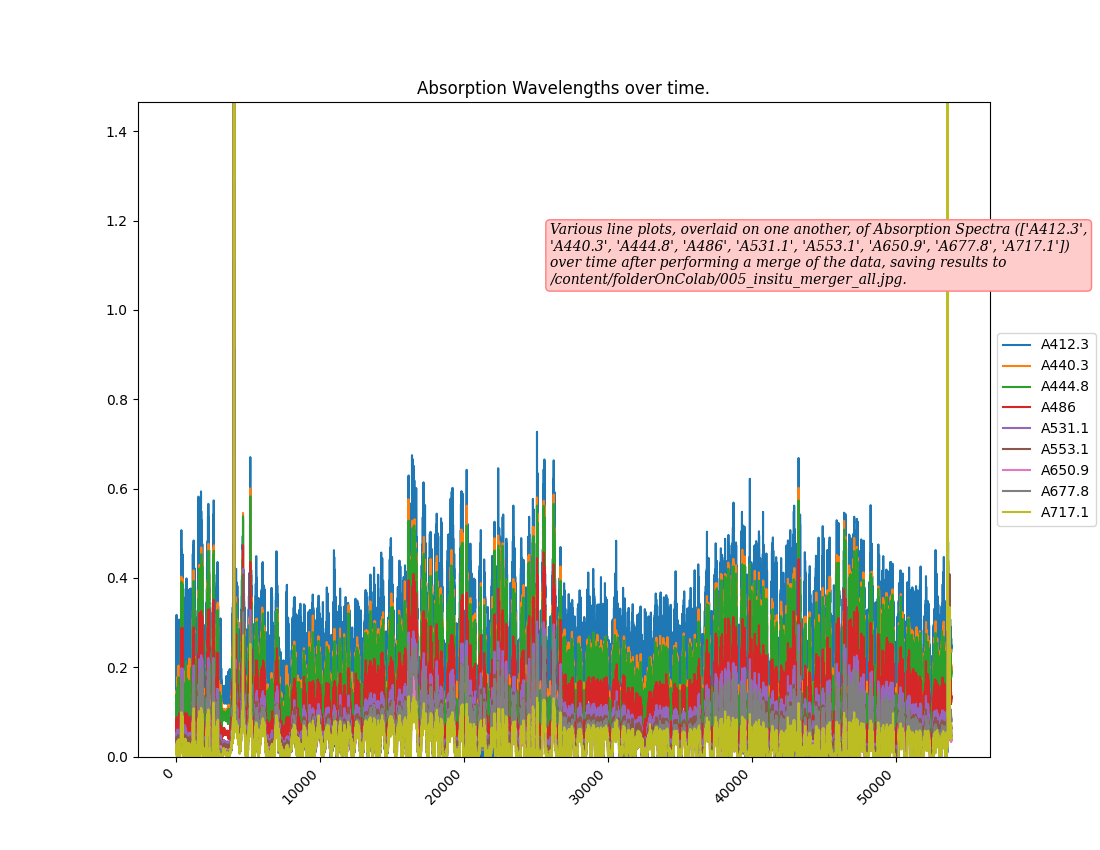 "Various line plots, overlaid on one another, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the data, saving results to /content/folderOnColab/005_insitu_merger_all.jpg.")

Various line plots, overlaid on one another, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 
'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the data, saving results 
to /content/folderOnColab/005_insitu_merger_all.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Each Wavelength Plotted

In [ ]:
#initial fiture creating a 2 x 5 # of plots in one page 20 x 10 in size (makes the plots larger)
fig, axes = plt.subplots(PLT_MAX_ROW, PLT_MAX_COL, figsize=(FIGURE_WIDTH,FIGURE_HEIGHT))
#iterate through the absorption array
for idx in target_col_idx:
    if ( col_index == (PLT_MAX_COL ) ):
        row_index +=1
        col_index = 0
    ax=df[df.columns[idx]].plot(ax=axes[row_index,col_index])
    #legend offset removed, not enough room in the plot screen
    #ax.legend(loc='center left', bbox_to_anchor=(PLT_LGD_X_OFFSET,PLT_LGD_Y_OFFSET))
    spectra_specific_mean=spectra_means[df.columns[idx]]
    spectra_specific_std=spectra_std[df.columns[idx]]
    y_range_limit=spectra_specific_mean + (spectra_specific_std * PLT_Y_SCALE_STDDEV)
    ax.set_ylim(bottom=0,top=y_range_limit)
    ax.set_title(label="Absorption @ " + df.columns[idx])
    ax.set_ylabel=""
    ax.set_xlabel="Time(s)"
    col_index+=1

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_individual{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Various line plots, side by side (individual plots), of Absorption Spectra ({str(spectra)}) over time after performing a merge of the data, saving results to {target_filename}.";

bit_bucket=plt.text(0.5,
                   0.7,
                  caption_text,
                  rotation=0.0,
                  ha="left",
                  va="center",
                  fontsize=IMG_FONT_SIZE_MIN,
                  family='serif',
                  style='oblique',
                  wrap=True,
                  bbox=dict(boxstyle="round",
                            ec=(1., 0.5, 0.5),
                            fc=(1., 0.8, 0.8),
                            ),
                  transform=fig.transFigure
                  );

#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_individual{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);

Next display is a Various line plots, side by side (individual plots), of Absorption Spectra (['A412.3', 'A440.3', 
'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the 
data, saving results to /content/folderOnColab/005_insitu_merger_individual.jpg.

![](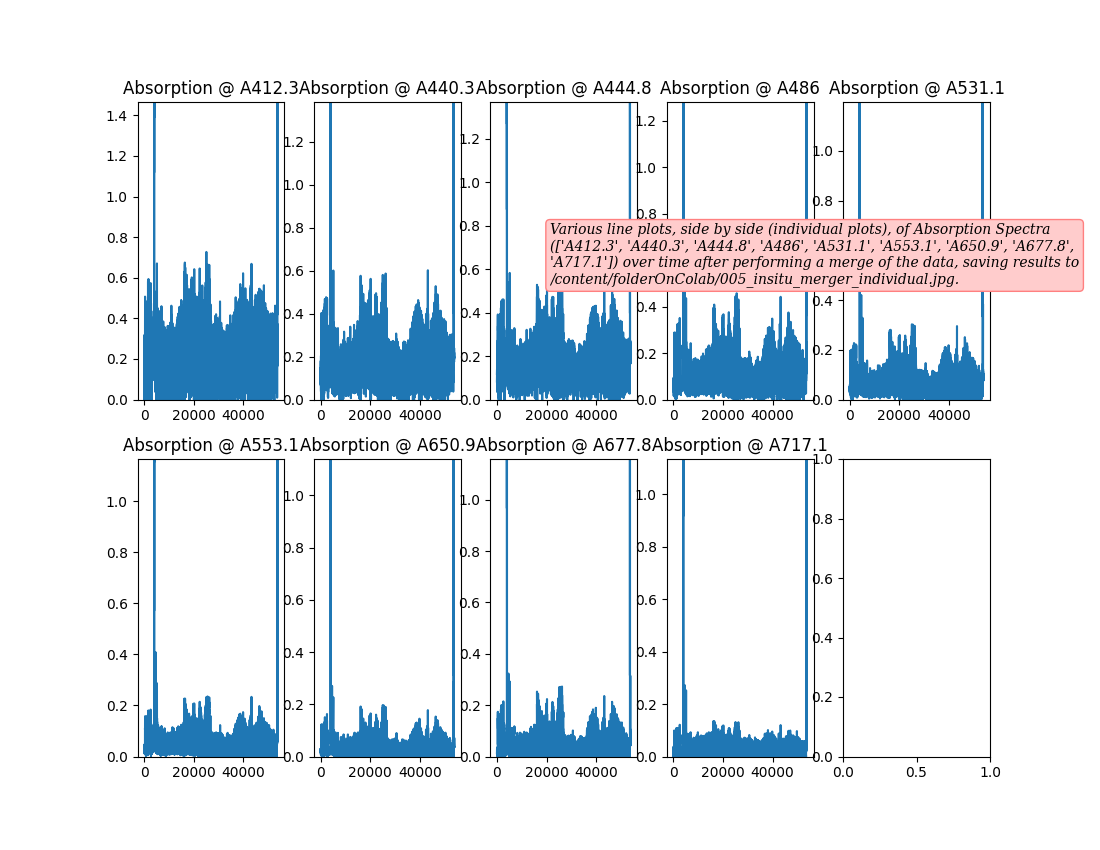 "Various line plots, side by side (individual plots), of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the data, saving results to /content/folderOnColab/005_insitu_merger_individual.jpg.")

Various line plots, side by side (individual plots), of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 
'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']) over time after performing a merge of the data, saving results 
to /content/folderOnColab/005_insitu_merger_individual.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

In [ ]:
#output the names of columns to a list; just an example
spectra_names=spectra

plt.close()
fig, axes = plt.subplots(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.set_title='Absorption Means'
plt.setp(labels,rotation=45,horizontalalignment='right')
ax=plt.errorbar(df.columns[target_col_idx],spectra_means, spectra_std, linestyle='None', marker='^' )

axes.set_title(label="Absorption Wavelengths Error Bars")
ax.set_ylabel="Wavelength"
ax.set_xlabel="Absorption"

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_error{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Error bar plots, side by side bars in one plot, of Absorption Spectra ({str(spectra)}), saving results to {target_filename}.";

bit_bucket=plt.text(0.5,
                   0.7,
                  caption_text,
                  rotation=0.0,
                  ha="left",
                  va="center",
                  fontsize=IMG_FONT_SIZE_MIN,
                  family='serif',
                  style='oblique',
                  wrap=True,
                  bbox=dict(boxstyle="round",
                            ec=(1., 0.5, 0.5),
                            fc=(1., 0.8, 0.8),
                            ),
                  transform=fig.transFigure
                  );

#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_error{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);


Next display is a Error bar plots, side by side bars in one plot, of Absorption Spectra (['A412.3', 'A440.3', 
'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']), saving results to 
/content/folderOnColab/005_insitu_merger_error.jpg.

![](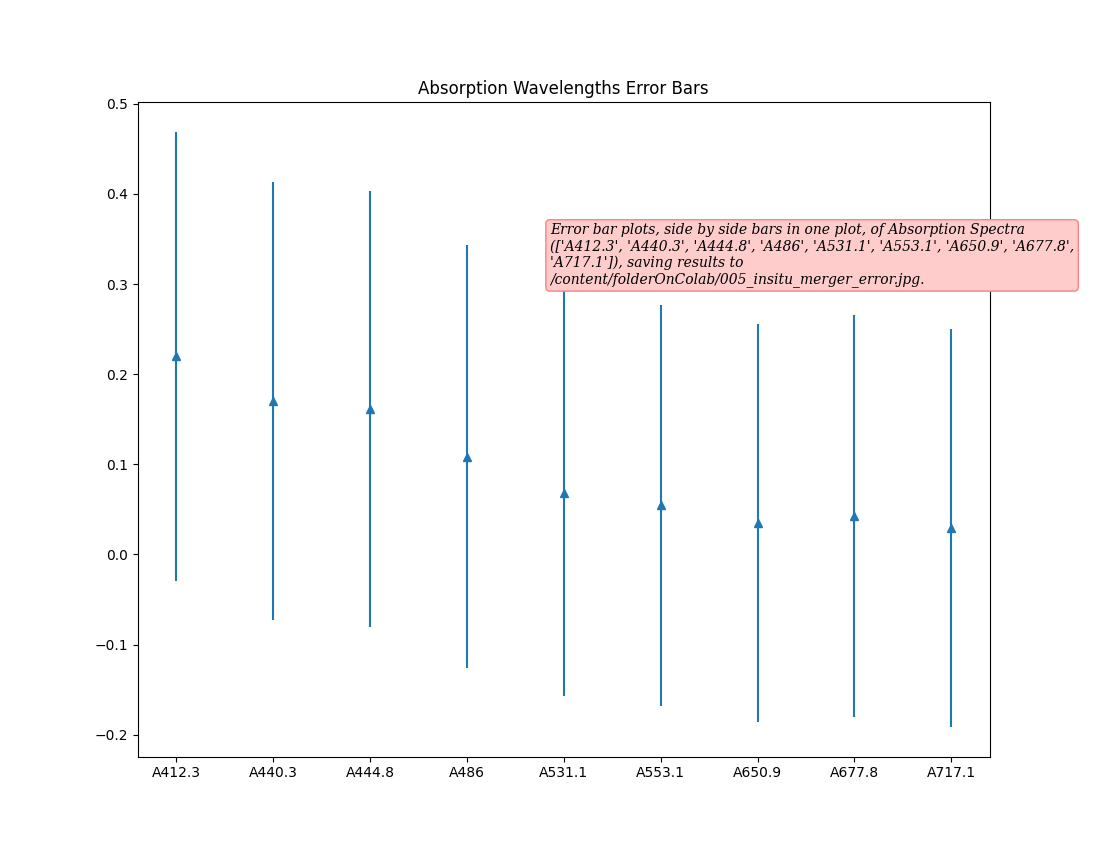 "Error bar plots, side by side bars in one plot, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']), saving results to /content/folderOnColab/005_insitu_merger_error.jpg.")

Error bar plots, side by side bars in one plot, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 
'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']), saving results to 
/content/folderOnColab/005_insitu_merger_error.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Seaborn Plots

Seaborn can make plots based on data alone and can infer what should be plot.

In [ ]:

#new figure using seaborn api which "knows" your data based on titles / names
import seaborn as sns

fig, axes = plt.subplots(figsize=(5,5))
sns.set(style="darkgrid")

ax=sns.lineplot(data=spectra_means, label="Mean")
ax=sns.lineplot(data=spectra_std, label="Std Dev")

ax.set_title("Absorption Statistics")
ax.set_ylabel("Absorption")
ax.set_xlabel("Wavelengths")
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_sns{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Seaborn plots, statistics, of Absorption Spectra ({str(spectra)}), saving results to {target_filename}.";


#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_sns{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);


Next display is a Seaborn plots, statistics, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 
'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']), saving results to 
/content/folderOnColab/005_insitu_merger_sns.jpg.

![](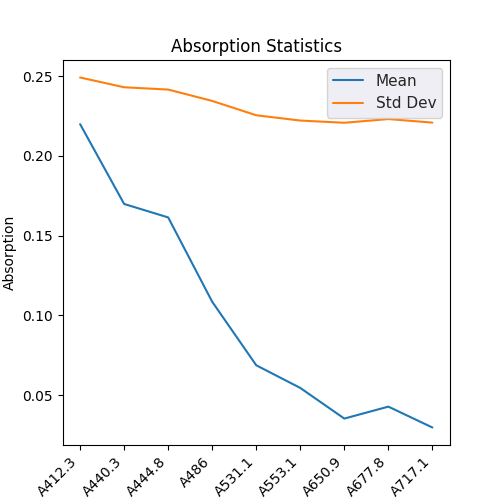 "Seaborn plots, statistics, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 'A531.1', 'A553.1', 'A650.9', 'A677.8', 'A717.1']), saving results to /content/folderOnColab/005_insitu_merger_sns.jpg.")

Seaborn plots, statistics, of Absorption Spectra (['A412.3', 'A440.3', 'A444.8', 'A486', 'A531.1', 'A553.1', 
'A650.9', 'A677.8', 'A717.1']), saving results to /content/folderOnColab/005_insitu_merger_sns.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Depth over Time

Data inspection.

In [ ]:
sns.set(style="darkgrid")
marker_size=0.5

fig, axes = plt.subplots(figsize=(PLT_X_SIZE, PLT_Y_SIZE))
ax=sns.lineplot(data=df['SBE_Pressure(dbar)'], label="Depth")
ax.legend(loc='center left', bbox_to_anchor=(PLT_LGD_X_OFFSET,PLT_LGD_Y_OFFSET))
ax.set_title("Depth Over Time")
ax.set_ylabel("Depth")
ax.set_xlabel("Time")
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')
plt.savefig(target_folder+os.sep+"DepthOverTime.png")

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_depthOverTime{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Seaborn plots demonstrating the depth gauge going up and down over time, used for general validation of the data, saving results to {target_filename}.";


#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_depthOverTime{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);

Next display is a Seaborn plots demonstrating the depth gauge going up and down over time, used for general 
validation of the data, saving results to /content/folderOnColab/005_insitu_merger_depthOverTime.jpg.

![](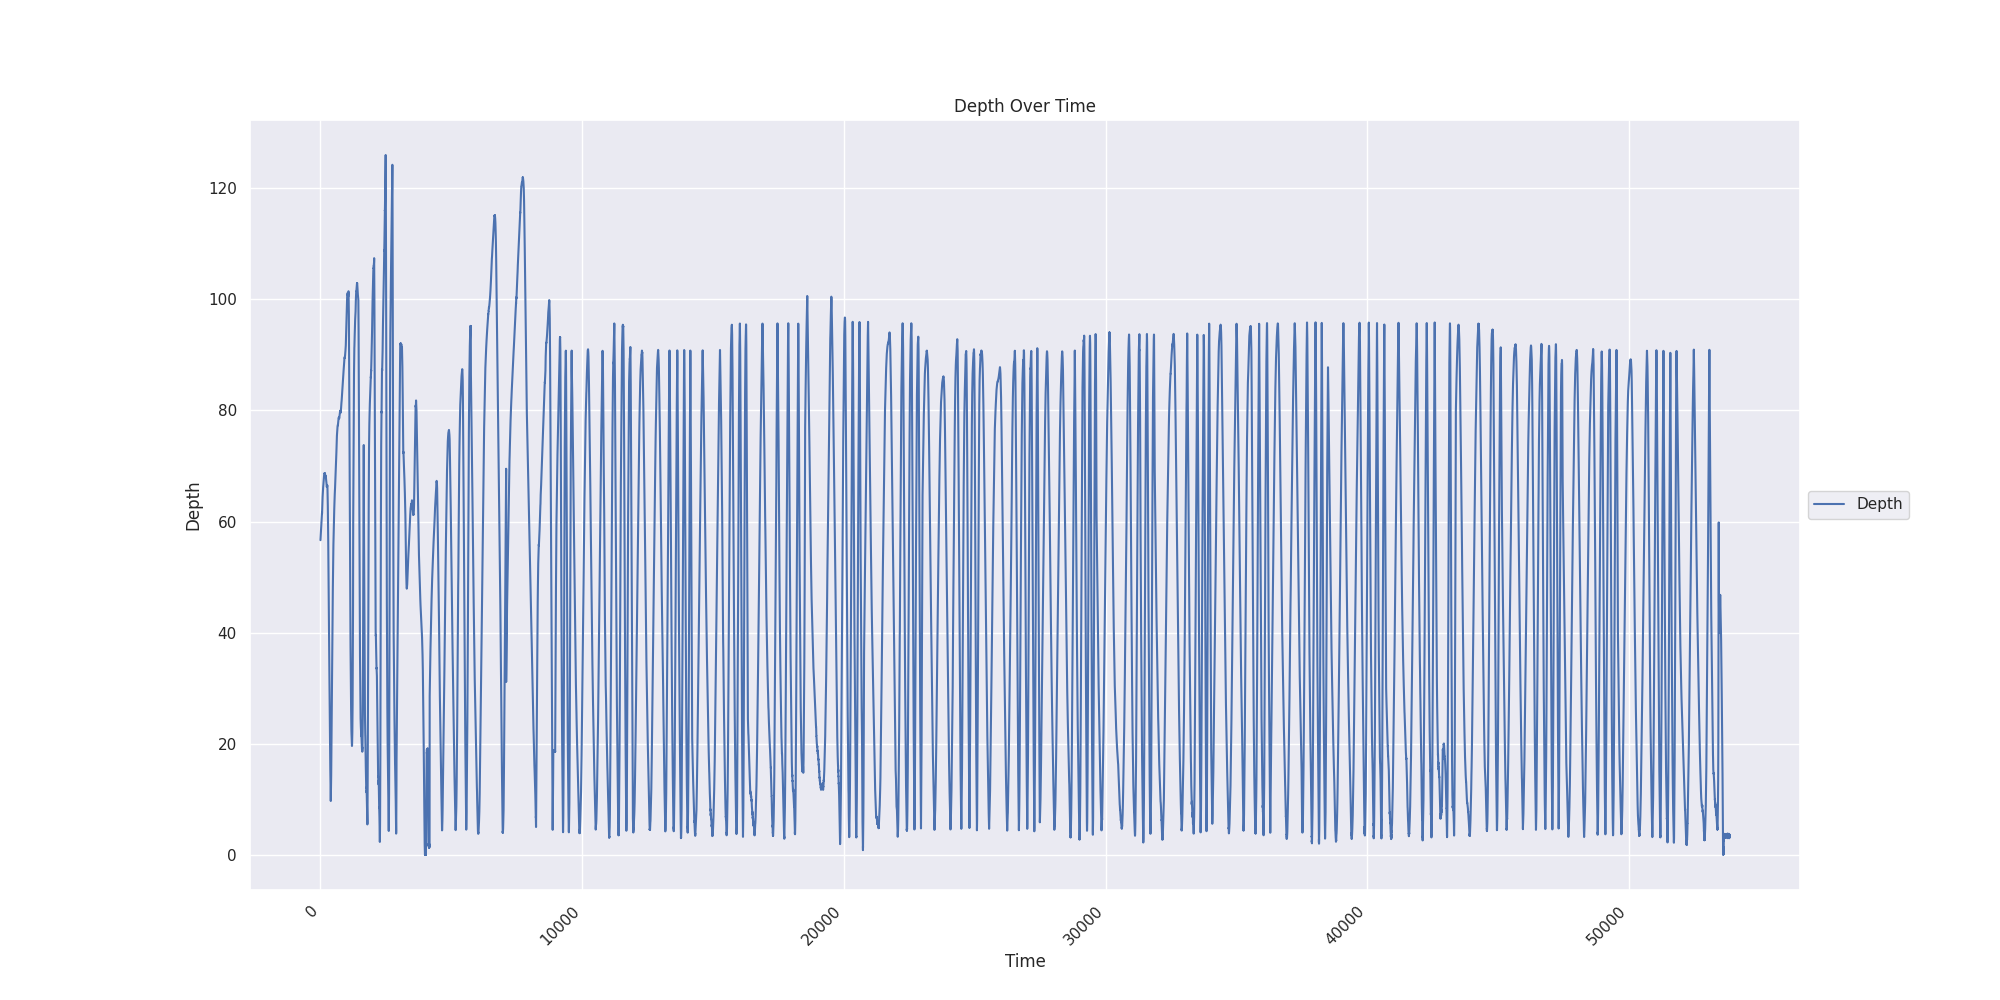 "Seaborn plots demonstrating the depth gauge going up and down over time, used for general validation of the data, saving results to /content/folderOnColab/005_insitu_merger_depthOverTime.jpg.")

Seaborn plots demonstrating the depth gauge going up and down over time, used for general validation of the data, 
saving results to /content/folderOnColab/005_insitu_merger_depthOverTime.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Do we know if the data is accurate?  Did the merge actually merge our values?

In [ ]:
libraries=["cartopy", "pyproj", "OWSLib", "geoviews", "jupyter_bokeh", "bokeh"]

try:
  for library in libraries:
      if library == "Pillow":
        spec = importlib.util.find_spec("PIL")
      else:
        spec = importlib.util.find_spec(library)
      if spec is None:
        print("Installing library " + library)
        subprocess.run(["pip", "install" , library, "--quiet"], check=True)
      else:
        print("Library " + library + " already installed.")
except Exception as e:
  process_exception(e)
  raise SystemError

Library cartopy already installed.
Library pyproj already installed.
Installing library OWSLib


CompletedProcess(args=['pip', 'install', 'OWSLib', '--quiet'], returncode=0)

Library geoviews already installed.
Library jupyter_bokeh already installed.
Library bokeh already installed.


In [ ]:
#import your libraries
try:
  import cartopy.crs as ccrs
  from pyproj import CRS
  from owslib.wms import WebMapService
  from owslib.wfs import WebFeatureService
  from owslib.wcs import WebCoverageService
  from owslib.wps import WebProcessingService
  from owslib.csw import CatalogueServiceWeb
  from owslib.sos import SensorObservationService
  from owslib.waterml.wml11 import WaterML_1_1
  from owslib.wmts import WebMapTileService
  import geoviews as gv
  import cartopy.crs as ccrs
  import panel as pn
  import requests
  import bokeh
  import jupyter_bokeh
except Exception as e:
  process_exception(e)
  raise SystemError

## Cartopy Validation

In [ ]:

# define your projections
crs = CRS.from_epsg(4326)
crs.to_epsg()
crs.to_authority()

# setup your seaborn style
sns.set_style("whitegrid")

# define spacing
geo_spacing=float(2.0)

# align variables
#TARGET_DATAFRAME=df
#DIS_MDL_DF=df
#DIS_SAT_DF=df

# find the center latitude and longitude to center the picture
central_longitude=df['SBE_Longitude'].median()
central_latitude=df['SBE_Latitude'].median()
west=df['SBE_Longitude'].min()   - geo_spacing
east=df['SBE_Longitude'].max()   + geo_spacing
north=df['SBE_Latitude'].max()  + geo_spacing
south=df['SBE_Latitude'].min()  - geo_spacing

# Create the initial plot
fig, axes = plt.subplots(figsize=(PLT_X_SIZE, PLT_Y_SIZE))
ax = fig.add_subplot(1, 1, 1,projection=ccrs.Miller(central_longitude=central_longitude))
ax.set_title("Shiptrack")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

# Add features
ax.set_extent([west, east, south, north])
ax.coastlines()
ax.stock_img()
ax.gridlines()
#ax.add_wms(wms='http://vmap0.tiles.osgeo.org/wms/vmap0',layers=['basic'])

# Mark up the plot for each track to display
SAT_COLOR='red'
MDL_COLOR='blue'
SAT_SIZE=100.0
MDL_SIZE=0.01

# Plot the actual results
ax.scatter(df['SBE_Longitude'],df['SBE_Latitude'],c=SAT_COLOR,s=SAT_SIZE, label='SBE Lat/Lon', transform=ccrs.PlateCarree())
ax.scatter(df['ACS_Longitude'],df['ACS_Latitude'],c=MDL_COLOR,s=MDL_SIZE, label='ACS Lat/Lon', transform=ccrs.PlateCarree())
plt.legend(loc='upper left');

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"005_insitu_merger_gps{IMG_EXT}";

# Create ALT text describing the image.
caption_text=f"Show geographically where the data is, saving results to {target_filename}.";


#Save
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"005_insitu_merger_gps{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text);


Next display is a Show geographically where the data is, saving results to 
/content/folderOnColab/005_insitu_merger_gps.jpg.

![](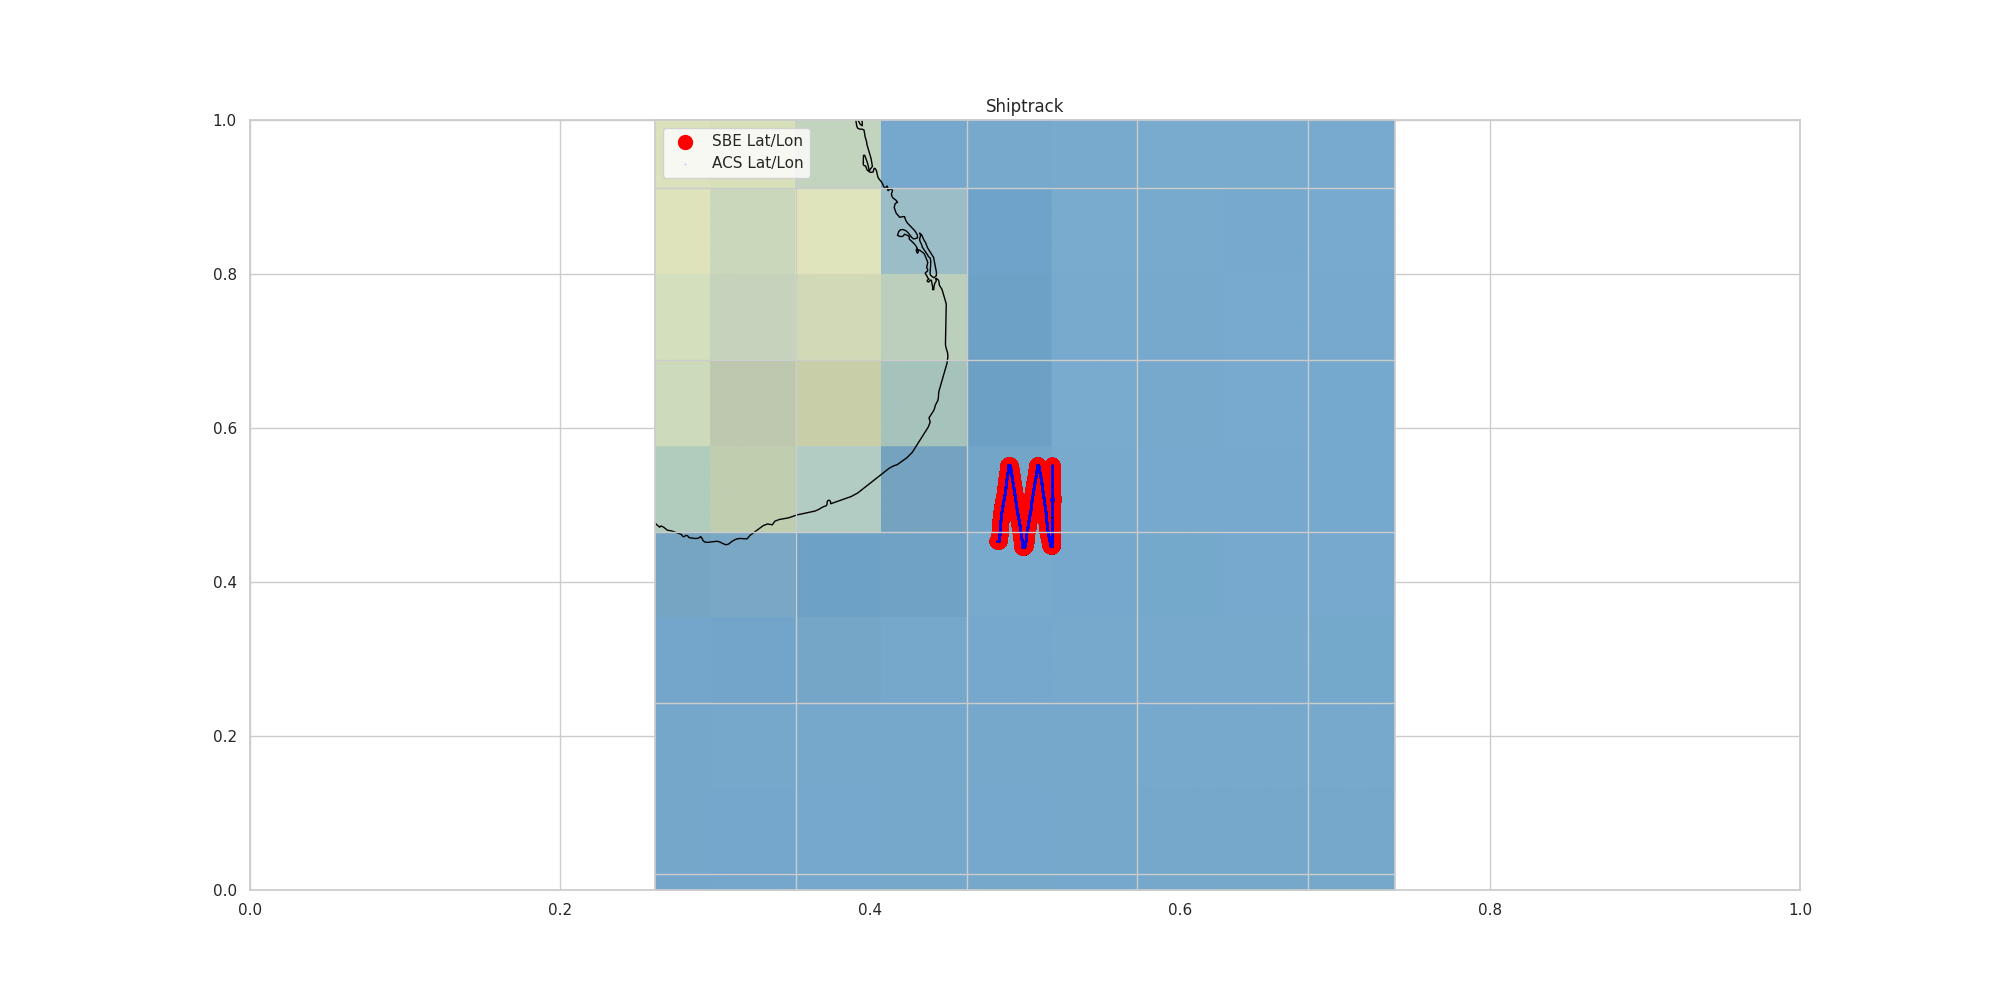 "Show geographically where the data is, saving results to /content/folderOnColab/005_insitu_merger_gps.jpg.")

Show geographically where the data is, saving results to /content/folderOnColab/005_insitu_merger_gps.jpg.

In [ ]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## GeoViews / Bokeh Validation

Note that several "features" from another data source will get pulled down and take a moment the first time you run this.

In [ ]:
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts
from cartopy import crs

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
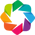

:Layout
   .RotatedPole.I                :Feature   [Longitude,Latitude]
   .LambertCylindrical.I         :Feature   [Longitude,Latitude]
   .Geostationary.I              :Feature   [Longitude,Latitude]
   .AzimuthalEquidistant.I       :Feature   [Longitude,Latitude]
   .OSGB.I                       :Feature   [Longitude,Latitude]
   .EuroPP.I                     :Feature   [Longitude,Latitude]
   .Gnomonic.I                   :Feature   [Longitude,Latitude]
   .Mollweide.I                  :Feature   [Longitude,Latitude]
   .OSNI.I                       :Feature   [Longitude,Latitude]
   .Miller.I                     :Feature   [Longitude,Latitude]
   .InterruptedGoodeHomolosine.I :Feature   [Longitude,Latitude]
   .SouthPolarStereo.I           :Feature   [Longitude,Latitude]
   .Orthographic.I               :Feature   [Longitude,Latitude]
   .NorthPolarStereo.I           :Feature   [Longitude,Latitude]
   .Robinson.I                   :Feature   [Longitude,Latitude]
   .LambertConformal.I           :Feature   [Longitude,Latitude]
   .AlbersEqualArea.I            :Feature   [Longitude,Latitude]
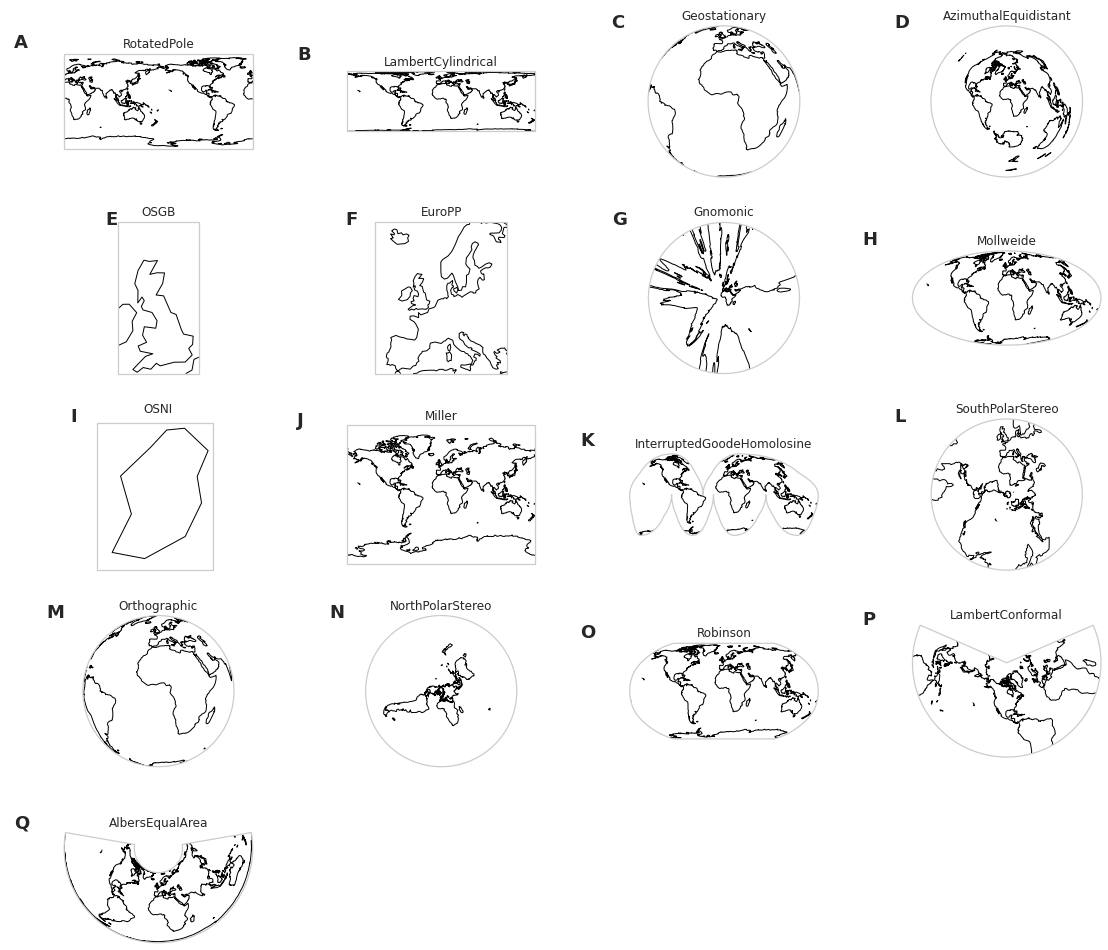

In [ ]:
# Projections examples
gv.extension('bokeh', 'matplotlib')
projections = [crs.RotatedPole, crs.LambertCylindrical, crs.Geostationary,
               crs.AzimuthalEquidistant, crs.OSGB, crs.EuroPP, crs.Gnomonic,
               crs.Mollweide, crs.OSNI, crs.Miller, crs.InterruptedGoodeHomolosine,
               crs.SouthPolarStereo,  crs.Orthographic, crs.NorthPolarStereo, crs.Robinson,
               crs.LambertConformal, crs.AlbersEqualArea]
proj_layout = gv.Layout([gf.coastline.relabel(group=p.__name__).opts(projection=p(), backend='matplotlib')
                         for p in projections])

gv.output(proj_layout, backend='matplotlib')

## Plot the Course

Take a look at the center of the map when rendered.  Use the controls on the right side of the map to allow zoom, select, and move options.



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
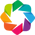

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Rivers.I    :Feature   [Longitude,Latitude]
   .Lakes.I     :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]

In [ ]:
gv.extension('bokeh', 'matplotlib')
pn.extension()

sbe_longitudes=df['SBE_Longitude'].values
sbe_latitudes=df['SBE_Latitude'].values

sbe_coord_points = gv.Points( (sbe_longitudes, sbe_latitudes), crs=ccrs.PlateCarree() ).opts(projection=ccrs.GOOGLE_MERCATOR,size=12,color='black')

features = gv.Overlay(
                      [gf.ocean,
                       gf.land,
                       gf.rivers,
                       gf.lakes,
                       gf.borders,
                       gf.coastline
                       ]
                      )

#(features * sbe_coord_points * acs_coord_points).options(
(features * sbe_coord_points).options(
    opts.Points(projection=ccrs.Miller(central_longitude=central_longitude), global_extent=True, width=1024, height=768, size=4, color='black'))

## Save your results

In [ ]:
#CREATE AN INITIAL "PROOF" OUTPUT for ANALYSIS
df.to_csv(target_folder+os.sep+"Initial_ACS_SBE_MergedProof.csv",index=False)

In [ ]:
#REARRANGE/TRIM COLUMNS TO SUPPORT WAP OUTPUT
df.drop(columns=['index_y','index_x','Seconds','Date','SBE_Conductivity(S/m)','ACS_Longitude','ACS_Latitude','ACS_Pressure'],inplace=True)

new_df=df.rename(index=str, columns={"Time(ms)": "UTC/GMT_Time","SBE_Longitude": "Longitude","SBE_Latitude": "Latitude","SBE_Salinity": "Salinity", "SBE_Temperature(C)": "Temp(C)"})
df=new_df
rprint(str(df.columns))
rprint("\n")

new_order=["Latitude","Longitude","UTC/GMT_Time","Temp(C)","Salinity","C400","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7","SBE_Pressure(dbar)"];
df=df[new_order]
rprint("")
df.head()

df['Salinity']=df['Salinity'].astype(float)
df['Temp(C)']=df['Temp(C)'].astype(float)
new_df=df.dropna()
df=new_df
df.head()

Index(['C400', 'C404.1', 'C407.1', 'C410.5', 'C413.9', 'C417.4', 'C421.5',
       'C426', 'C430.1', 'C433.8',
       ...
       'A735.6', 'A738.9', 'A742.7', 'Longitude', 'Latitude',
       'SBE_Pressure(dbar)', 'Temp(C)', 'Salinity', 'MS', 'UTC/GMT_Time'],
      dtype='object', length=173)

Latitude  Longitude  UTC/GMT_Time  Temp(C)  Salinity    C400  C404.1  C407.1  C410.5  C413.9  C417.4  C421.5    C426  C430.1  C433.8  C437.9  C442.1  C446.3  C451.1  C455.7  C459.9  C464.1  C468.5  C473.3    C478  C483.1  C487.6  C491.8    C496  C500.1  C504.8  C509.5  C514.4  C519.2  C523.9  C528.2  C532.3  C536.6  C540.9  C545.4  C549.9  C554.3  C558.7  C563.2  C567.6  C571.5  C575.4  C579.3  C582.9  C587.6  C591.7    C596  C600.6    C605  C609.3  C613.9  C618.4  C622.5  C626.5  C630.9    C635  C639.3  C643.6  C647.9  C652.7    C657  C661.4  C665.9  C670.3  C674.7  C678.8  C683.2  C687.1  C690.8  C694.7  C698.9  C702.3  C706.3    C710  C714.2  C717.6  C721.4  C725.6  C729.2  C732.7  C735.9  C739.4  C743.7  A398.4  A402.1  A405.7  A408.9  A412.3  A415.8  A419.8    A424  A428.3  A432.2  A436.1  A440.3  A444.8  A449.5  A454.1  A458.3  A462.4  A466.8  A471.5  A476.4  A481.3    A486  A490.2  A494.4  A498.8  A503.1  A507.8  A512.6  A517.7  A522.5  A526.8  A531.1  A535.3  A539.7  A544.2  A548.7  A553.1  A557.5  A562.2  A566.6  A570.8  A574.6  A578.6    A582  A585.8  A589.6    A594  A598.7  A602.9  A607.6  A611.8  A616.5  A620.9  A625.2  A629.4  A633.7  A637.7  A642.1  A646.4  A650.9  A655.4    A660  A664.7    A669  A673.6  A677.8    A682  A685.9    A690  A693.7  A697.9  A701.7  A705.4  A709.2  A713.4  A717.1  A720.8  A724.6  A728.6  A732.1  A735.6  A738.9  A742.7  SBE_Pressure(dbar)
0    6.3881    82.5004    0.0000e+00  23.0886   34.8610  0.3842  0.3790  0.3553  0.3232  0.3223  0.2925  0.2877  0.3031  0.2940  0.2948  0.2888  0.2803  0.2727  0.2692  0.2671  0.2655  0.2583  0.2552  0.2468  0.2340  0.2345  0.2263  0.2215  0.2181  0.2092  0.2071  0.2018  0.1926  0.1926  0.1882  0.1847  0.1871  0.1792  0.1792  0.1763  0.1703  0.1757  0.1734  0.1733  0.1712  0.1659  0.1637  0.1606  0.1613  0.1585  0.1590  0.1596  0.1548  0.1522  0.1518  0.1494  0.1483  0.1476  0.1435  0.1426  0.1389  0.1384  0.1370  0.1337  0.1373  0.1336  0.1315  0.1305  0.1318  0.1266  0.1291  0.1293  0.1231  0.1253  0.1257  0.1220  0.1207  0.1191  0.1256  0.1272  0.1259  0.1269  0.1198  0.1277  0.1299  0.1249  0.1307  0.1292  0.1362  0.1590  0.1813  0.1946  0.1911  0.1882  0.1713  0.1610  0.1432  0.1377  0.1333  0.1258  0.1179  0.1109  0.1010  0.0939  0.0906  0.0887  0.0822  0.0789  0.0753  0.0702  0.0658  0.0630  0.0614  0.0571  0.0538  0.0508  0.0472  0.0443  0.0433  0.0417  0.0391  0.0382  0.0370  0.0363  0.0358  0.0355  0.0353  0.0344  0.0335  0.0336  0.0333  0.0319  0.0260  0.0287  0.0296  0.0294  0.0278  0.0267  0.0279  0.0309  0.0335  0.0342  0.0341  0.0325  0.0314  0.0304  0.0275  0.0249  0.0229  0.0208  0.0174  0.0155  0.0140  0.0133  0.0131  0.0131  0.0107  0.0084  0.0097  0.0112  0.0122  0.0146  0.0181  0.0206  0.0237  0.0262  0.0273  0.0265  0.0275  0.0308  0.0328             56.6524
1    6.3881    82.5004    1.1574e-05  23.0839   34.8597  0.3727  0.3607  0.3435  0.3376  0.3235  0.3080  0.3040  0.2988  0.2821  0.2783  0.2716  0.2614  0.2568  0.2446  0.2465  0.2445  0.2315  0.2342  0.2278  0.2146  0.2153  0.2090  0.2034  0.2023  0.1925  0.1944  0.1872  0.1792  0.1795  0.1737  0.1680  0.1699  0.1626  0.1615  0.1606  0.1542  0.1575  0.1543  0.1512  0.1519  0.1469  0.1454  0.1434  0.1432  0.1397  0.1410  0.1404  0.1362  0.1361  0.1376  0.1364  0.1349  0.1342  0.1303  0.1294  0.1266  0.1250  0.1250  0.1213  0.1240  0.1202  0.1171  0.1168  0.1192  0.1130  0.1136  0.1123  0.1042  0.1082  0.1080  0.1039  0.1073  0.1027  0.1110  0.1108  0.1090  0.1114  0.1070  0.1121  0.1147  0.1029  0.1072  0.1050  0.1121  0.1220  0.1183  0.1167  0.1178  0.1209  0.1392  0.1612  0.1823  0.1807  0.1645  0.1444  0.1297  0.1218  0.1160  0.1028  0.0914  0.0811  0.0746  0.0662  0.0644  0.0563  0.0505  0.0487  0.0461  0.0439  0.0427  0.0439  0.0432  0.0445  0.0447  0.0439  0.0437  0.0447  0.0439  0.0427  0.0423  0.0414  0.0385  0.0357  0.0339  0.0311  0.0291  0.0262  0.0251  0.0241  0.0240  0.0239  0.0241  0.0246  0.0246  0.0250  0.0248  0.0253  0.0259  0.0257  0.0254  0.0250  0.0251  0.

Latitude  Longitude  UTC/GMT_Time  Temp(C)  Salinity    C400  C404.1  C407.1  C410.5  C413.9  C417.4  C421.5    C426  C430.1  C433.8  C437.9  C442.1  C446.3  C451.1  C455.7  C459.9  C464.1  C468.5  C473.3    C478  C483.1  C487.6  C491.8    C496  C500.1  C504.8  C509.5  C514.4  C519.2  C523.9  C528.2  C532.3  C536.6  C540.9  C545.4  C549.9  C554.3  C558.7  C563.2  C567.6  C571.5  C575.4  C579.3  C582.9  C587.6  C591.7    C596  C600.6    C605  C609.3  C613.9  C618.4  C622.5  C626.5  C630.9    C635  C639.3  C643.6  C647.9  C652.7    C657  C661.4  C665.9  C670.3  C674.7  C678.8  C683.2  C687.1  C690.8  C694.7  C698.9  C702.3  C706.3    C710  C714.2  C717.6  C721.4  C725.6  C729.2  C732.7  C735.9  C739.4  C743.7  A398.4  A402.1  A405.7  A408.9  A412.3  A415.8  A419.8    A424  A428.3  A432.2  A436.1  A440.3  A444.8  A449.5  A454.1  A458.3  A462.4  A466.8  A471.5  A476.4  A481.3    A486  A490.2  A494.4  A498.8  A503.1  A507.8  A512.6  A517.7  A522.5  A526.8  A531.1  A535.3  A539.7  A544.2  A548.7  A553.1  A557.5  A562.2  A566.6  A570.8  A574.6  A578.6    A582  A585.8  A589.6    A594  A598.7  A602.9  A607.6  A611.8  A616.5  A620.9  A625.2  A629.4  A633.7  A637.7  A642.1  A646.4  A650.9  A655.4    A660  A664.7    A669  A673.6  A677.8    A682  A685.9    A690  A693.7  A697.9  A701.7  A705.4  A709.2  A713.4  A717.1  A720.8  A724.6  A728.6  A732.1  A735.6  A738.9  A742.7  SBE_Pressure(dbar)
0    6.3881    82.5004    0.0000e+00  23.0886   34.8610  0.3842  0.3790  0.3553  0.3232  0.3223  0.2925  0.2877  0.3031  0.2940  0.2948  0.2888  0.2803  0.2727  0.2692  0.2671  0.2655  0.2583  0.2552  0.2468  0.2340  0.2345  0.2263  0.2215  0.2181  0.2092  0.2071  0.2018  0.1926  0.1926  0.1882  0.1847  0.1871  0.1792  0.1792  0.1763  0.1703  0.1757  0.1734  0.1733  0.1712  0.1659  0.1637  0.1606  0.1613  0.1585  0.1590  0.1596  0.1548  0.1522  0.1518  0.1494  0.1483  0.1476  0.1435  0.1426  0.1389  0.1384  0.1370  0.1337  0.1373  0.1336  0.1315  0.1305  0.1318  0.1266  0.1291  0.1293  0.1231  0.1253  0.1257  0.1220  0.1207  0.1191  0.1256  0.1272  0.1259  0.1269  0.1198  0.1277  0.1299  0.1249  0.1307  0.1292  0.1362  0.1590  0.1813  0.1946  0.1911  0.1882  0.1713  0.1610  0.1432  0.1377  0.1333  0.1258  0.1179  0.1109  0.1010  0.0939  0.0906  0.0887  0.0822  0.0789  0.0753  0.0702  0.0658  0.0630  0.0614  0.0571  0.0538  0.0508  0.0472  0.0443  0.0433  0.0417  0.0391  0.0382  0.0370  0.0363  0.0358  0.0355  0.0353  0.0344  0.0335  0.0336  0.0333  0.0319  0.0260  0.0287  0.0296  0.0294  0.0278  0.0267  0.0279  0.0309  0.0335  0.0342  0.0341  0.0325  0.0314  0.0304  0.0275  0.0249  0.0229  0.0208  0.0174  0.0155  0.0140  0.0133  0.0131  0.0131  0.0107  0.0084  0.0097  0.0112  0.0122  0.0146  0.0181  0.0206  0.0237  0.0262  0.0273  0.0265  0.0275  0.0308  0.0328             56.6524
1    6.3881    82.5004    1.1574e-05  23.0839   34.8597  0.3727  0.3607  0.3435  0.3376  0.3235  0.3080  0.3040  0.2988  0.2821  0.2783  0.2716  0.2614  0.2568  0.2446  0.2465  0.2445  0.2315  0.2342  0.2278  0.2146  0.2153  0.2090  0.2034  0.2023  0.1925  0.1944  0.1872  0.1792  0.1795  0.1737  0.1680  0.1699  0.1626  0.1615  0.1606  0.1542  0.1575  0.1543  0.1512  0.1519  0.1469  0.1454  0.1434  0.1432  0.1397  0.1410  0.1404  0.1362  0.1361  0.1376  0.1364  0.1349  0.1342  0.1303  0.1294  0.1266  0.1250  0.1250  0.1213  0.1240  0.1202  0.1171  0.1168  0.1192  0.1130  0.1136  0.1123  0.1042  0.1082  0.1080  0.1039  0.1073  0.1027  0.1110  0.1108  0.1090  0.1114  0.1070  0.1121  0.1147  0.1029  0.1072  0.1050  0.1121  0.1220  0.1183  0.1167  0.1178  0.1209  0.1392  0.1612  0.1823  0.1807  0.1645  0.1444  0.1297  0.1218  0.1160  0.1028  0.0914  0.0811  0.0746  0.0662  0.0644  0.0563  0.0505  0.0487  0.0461  0.0439  0.0427  0.0439  0.0432  0.0445  0.0447  0.0439  0.0437  0.0447  0.0439  0.0427  0.0423  0.0414  0.0385  0.0357  0.0339  0.0311  0.0291  0.0262  0.0251  0.0241  0.0240  0.0239  0.0241  0.0246  0.0246  0.0250  0.0248  0.0253  0.0259  0.0257  0.0254  0.0250  0.0251  0.

In [ ]:
# Save to a plain text file
df.to_csv(target_folder+os.sep+"Final_ACS_SBE_Merged.csv",index=False, sep="\t")

In [ ]:
# OR save to a Python pickeled file
try:
  target_filename=target_folder+os.sep+"Final_ACS_SBE_Merged.bin"
  pickle.dump(df, open(target_filename, "wb"))
  me = pickle.load(open(target_filename, "rb"))
except (pickle.UnpicklingError, FileNotFoundError, IOError, Exception)  as e:
  rprint("FAILED to unpickle the saved binary file, you might have corruption, investigate.")
  process_exception(e)
rprint(f"...saved and reloaded {target_filename}")

...saved and reloaded /content/folderOnColab/Final_ACS_SBE_Merged.bin